# Store velocities and sound celerity in the Gulf Stream area for ISL collab.

In [1]:
# import libraries
%matplotlib inline
from glob import glob
#from netCDF4 import Dataset
#import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gsw

#from dask.distributed import Client
#client = Client(processes=False)

from clib.flow import *

In [2]:
# load grid info
grd = grid()

# output files
ofiles = sorted(glob(grd._data_dir+'*avg*.nc'))
ofile = ofiles[0]

# time to extract
it = 0
ds = xr.open_dataset(ofile).isel(time=it).drop('time')
#ds = xr.open_dataset(ofile, chunks={'s_rho': 2}).isel(time=it).drop('time')
#ds = xr.open_dataset(ofile, chunks={'xi_rho': 10}).isel(time=it).drop('time')
#ds = xr.open_dataset(ofile, chunks={'xi_rho': 100, 'eta_rho':100, 'xi_u': 100, 'eta_v':100}).isel(time=it).drop('time')

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070


In [3]:
print(grd._ds)

<xarray.Dataset>
Dimensions:    (eta_psi: 1601, eta_rho: 1602, eta_u: 1602, eta_v: 1601, one: 1, s_rho: 50, s_w: 51, xi_psi: 2001, xi_rho: 2002, xi_u: 2001, xi_v: 2002)
Coordinates:
  * s_w        (s_w) float32 -1.0 -0.98 -0.96 -0.94 -0.92 -0.9 -0.88 -0.86 ...
  * s_rho      (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 ...
Dimensions without coordinates: eta_psi, eta_rho, eta_u, eta_v, one, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    spherical  (one) |S1 ...
    angle      (eta_rho, xi_rho) float64 ...
    h          (eta_rho, xi_rho) float64 5.352e+03 5.348e+03 5.344e+03 ...
    hraw       (eta_rho, xi_rho) float64 ...
    f          (eta_rho, xi_rho) float64 ...
    pm         (eta_rho, xi_rho) float64 ...
    pn         (eta_rho, xi_rho) float64 ...
    lon_rho    (eta_rho, xi_rho) float64 -68.81 -68.81 -68.8 -68.8 -68.79 ...
    lat_rho    (eta_rho, xi_rho) float64 34.12 34.12 34.13 34.13 34.13 34.13 ...
    mask_rho   (eta_rho, xi_rho) float64 ...
    lon_psi    (e

In [4]:
lon, lat = grd['lon_rho'], grd['lat_rho']
h, zeta = grd['h'], ds['zeta']
z = grd.get_z(zeta, h, name='z_rho')
#
h_u, zeta_u = rho2u(h), rho2u(zeta)
z_u = grd.get_z(zeta_u, h_u, name='z_u')
#
h_v, zeta_v = rho2v(h), rho2v(zeta)
z_v = grd.get_z(zeta_v, h_v, name='z_v')
#
z_w = grd.get_z(zeta, h, sc=grd.sc_w, cs=grd.Cs_w,name='z_w')
#
print(z)
#print(z, z_u, z_v)

<xarray.DataArray 'z_rho' (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
array([[[-5.233859e+03, -5.229779e+03, ..., -4.822513e+03, -4.849863e+03],
        [-5.228435e+03, -5.225364e+03, ..., -4.771928e+03, -4.818311e+03],
        ...,
        [-3.876936e+01, -3.872557e+01, ..., -5.158374e+01, -5.162989e+01],
        [-3.832301e+01, -3.829179e+01, ..., -5.146575e+01, -5.151167e+01]],

       [[-4.977100e+03, -4.973226e+03, ..., -4.586569e+03, -4.612535e+03],
        [-4.971951e+03, -4.969035e+03, ..., -4.538543e+03, -4.582580e+03],
        ...,
        [-3.786456e+01, -3.782194e+01, ..., -5.032653e+01, -5.037136e+01],
        [-3.743013e+01, -3.739974e+01, ..., -5.021189e+01, -5.025650e+01]],

       ...,

       [[-8.677816e+00, -8.677074e+00, ..., -8.619758e+00, -8.625111e+00],
        [-8.676829e+00, -8.676263e+00, ..., -8.609783e+00, -8.618933e+00],
        ...,
        [-1.596205e+00, -1.595172e+00, ..., -1.943701e+00, -1.944717e+00],
        [-1.585553e+00, -1.584807e+00, ..., -1.9410

<xarray.DataArray 'z' (s_rho: 50)>
array([-5.029471e+03, -4.783056e+03, -4.514622e+03, -4.230537e+03,
       -3.937379e+03, -3.641442e+03, -3.348362e+03, -3.062902e+03,
       -2.788852e+03, -2.529029e+03, -2.285353e+03, -2.058951e+03,
       -1.850290e+03, -1.659311e+03, -1.485549e+03, -1.328250e+03,
       -1.186459e+03, -1.059103e+03, -9.450490e+02, -8.431484e+02,
       -7.522753e+02, -6.713478e+02, -5.993451e+02, -5.353164e+02,
       -4.783862e+02, -4.277551e+02, -3.826989e+02, -3.425653e+02,
       -3.067701e+02, -2.747922e+02, -2.461687e+02, -2.204896e+02,
       -1.973930e+02, -1.765603e+02, -1.577117e+02, -1.406019e+02,
       -1.250165e+02, -1.107688e+02, -9.769604e+01, -8.565745e+01,
       -7.453135e+01, -6.421314e+01, -5.461349e+01, -4.565669e+01,
       -3.727929e+01, -2.942893e+01, -2.206340e+01, -1.514982e+01,
       -8.664080e+00, -2.590330e+00])
Coordinates:
  * s_rho    (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 -0.85 ...


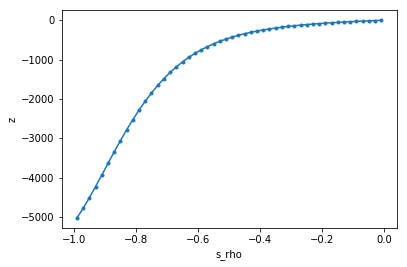

In [5]:
# select one depth profile
ilon, ilat = int(grd.Lp/2),0
z_uni = z.isel(xi_rho=ilon, eta_rho=ilat).rename('z')
z_uni.plot(marker='.')
print(z_uni)

--- 

## on native grids

In [6]:
def store(v, fname):
    v.to_dataset().to_netcdf('/home1/datawork/aponte/cognac/isl/'+fname,  mode='w', 
                             encoding={v.name: {'dtype': 'float32'}})

In [7]:
store(ds.u, 'u.nc')
store(z_u, 'z_u.nc')

/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)
/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [8]:
store(ds.v, 'v.nc')
store(z_v, 'z_v.nc')

/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [9]:
store(ds.omega, 'omega.nc')
store(z_w, 'z_w.nc')

/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [10]:
T, S = ds['temp'], ds['salt']
T['s_rho'] = z.s_rho # should be fixed upstream
S['s_rho'] = z.s_rho # should be fixed upstream

In [11]:
# compute acoustic celerity
c = xr.apply_ufunc(get_soundc, T, S, z, lon, lat, dask='parallelized', output_dtypes=[float])
c = c.rename('acelerity')

In [12]:
store(c, 'c.nc')
store(z, 'z_rho.nc')

/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


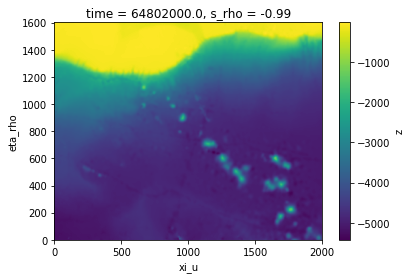

In [6]:
z_u.isel(s_rho=0).plot()

In [6]:
#ds = xr.open_dataset(ofile, chunks={'s_rho': 2}).isel(time=it)
#u, v, omega = ds['u'], ds['v'], ds['omega']
#T, S, u, v, omega = ds['temp'], ds['salt'], ds['u'], ds['v'], ds['omega']
# fix indices
#T['s_rho'] = z.s_rho # should be fixed upstream
#S['s_rho'] = z.s_rho # should be fixed upstream
u['s_rho'] = z.s_rho # should be fixed upstream
v['s_rho'] = z.s_rho # should be fixed upstream
#omega['s_rho'] = z.s_rho # should be fixed upstream

In [7]:
print(ds)

<xarray.Dataset>
Dimensions:     (auxil: 4, eta_rho: 1602, eta_v: 1601, s_rho: 50, s_w: 51, xi_rho: 2002, xi_u: 2001)
Coordinates:
    time        float32 64802000.0
Dimensions without coordinates: auxil, eta_rho, eta_v, s_rho, s_w, xi_rho, xi_u
Data variables:
    time_step   (auxil) int32 dask.array<shape=(4,), chunksize=(4,)>
    scrum_time  float32 dask.array<shape=(), chunksize=()>
    zeta        (eta_rho, xi_rho) float32 dask.array<shape=(1602, 2002), chunksize=(1602, 2002)>
    ubar        (eta_rho, xi_u) float32 dask.array<shape=(1602, 2001), chunksize=(1602, 2001)>
    vbar        (eta_v, xi_rho) float32 dask.array<shape=(1601, 2002), chunksize=(1601, 2002)>
    u           (s_rho, eta_rho, xi_u) float32 dask.array<shape=(50, 1602, 2001), chunksize=(2, 1602, 2001)>
    v           (s_rho, eta_v, xi_rho) float32 dask.array<shape=(50, 1601, 2002), chunksize=(2, 1601, 2002)>
    temp        (s_rho, eta_rho, xi_rho) float32 dask.array<shape=(50, 1602, 2002), chunksize=(2, 1602, 2

In [8]:
# interpolate u,v, w at rho points
lu = u.rename({'xi_u': 'xi_rho'})
u = xr.concat([lu.isel(xi_rho=0), 
                ((lu.shift(xi_rho=1)+lu)*.5).isel(xi_rho=slice(1,None)), 
                lu.isel(xi_rho=-1)], dim='xi_rho', compat='equals')
#
lv = v.rename({'eta_v': 'eta_rho'})
v = xr.concat([lv.isel(eta_rho=0), 
                ((lv.shift(eta_rho=1)+lv)*.5).isel(eta_rho=slice(1,None)), 
                lv.isel(eta_rho=-1)], dim='eta_rho', compat='equals')
#
lomega = omega.rename({'s_w': 's_rho'})
omega = ((lomega.shift(s_rho=1)+lomega)*.5).isel(s_rho=slice(1,None))
#
print(omega)

<xarray.DataArray 'omega' (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
dask.array<shape=(50, 1602, 2002), dtype=float32, chunksize=(50, 1602, 2002)>
Coordinates:
    time     float32 64802000.0
Dimensions without coordinates: s_rho, eta_rho, xi_rho


In [9]:
# compute acoustic celerity
c = xr.apply_ufunc(get_soundc, T, S, z, lon, lat, dask='parallelized', output_dtypes=[float])
c = c.rename('acelerity')

In [10]:
# store to netcdf file
sds = xr.merge([u, v, omega, c, z])
#sds = sds.chunk({'xi_rho': 10, 'eta_rho': None})
print(sds)
sds.to_netcdf('/home1/datawork/aponte/cognac/isl/uvomega.nc',  mode='w')
print(sds)

<xarray.Dataset>
Dimensions:    (eta_rho: 1602, s_rho: 50, xi_rho: 2002)
Coordinates:
  * s_rho      (s_rho) float64 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 ...
    time       float32 64802000.0
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    u          (s_rho, eta_rho, xi_rho) float32 dask.array<shape=(50, 1602, 2002), chunksize=(2, 1602, 1)>
    v          (s_rho, xi_rho, eta_rho) float32 dask.array<shape=(50, 2002, 1602), chunksize=(2, 2002, 1)>
    omega      (s_rho, eta_rho, xi_rho) float32 dask.array<shape=(50, 1602, 2002), chunksize=(50, 1602, 2002)>
    acelerity  (s_rho, eta_rho, xi_rho) float64 dask.array<shape=(50, 1602, 2002), chunksize=(2, 1602, 2002)>
    z          (s_rho, eta_rho, xi_rho) float64 dask.array<shape=(50, 1602, 2002), chunksize=(50, 1602, 2002)>


/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


ValueError: inconsistent chunks

---

## Computes sound celerity now on horizontally uniform vertical grid

In [5]:
# chunk along one dimension
grd._ds = grd._ds.chunk({'xi_rho':10})
#ds = ds.chunk({'xi_rho':1})

In [9]:
T, S, u, v, omega = ds['temp'], ds['salt'], ds['u'], ds['v'], ds['omega']
# fix indices
T['s_rho'] = z.s_rho # should be fixed upstream
S['s_rho'] = z.s_rho # should be fixed upstream

In [10]:
T_uni = xr.apply_ufunc(interp2z, z_uni+0.*z, z, T, dask='parallelized', output_dtypes=[float])
S_uni = xr.apply_ufunc(interp2z, z_uni+0.*z, z, S, dask='parallelized', output_dtypes=[float])
u_uni = xr.apply_ufunc(interp2z, z_uni+0.*z, z, u, dask='parallelized', output_dtypes=[float]).rename('u')
v_uni = xr.apply_ufunc(interp2z, z_uni+0.*z, z, v, dask='parallelized', output_dtypes=[float]).rename('v')
omega_uni = xr.apply_ufunc(interp2z, z_uni+0.*z, z, omega, dask='parallelized', output_dtypes=[float]).rename('omega')
print(T_uni)

<xarray.DataArray (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
dask.array<shape=(50, 1602, 2002), dtype=float64, chunksize=(50, 1602, 10)>
Coordinates:
    time     float32 64802000.0
  * s_rho    (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 -0.85 ...
Dimensions without coordinates: eta_rho, xi_rho


In [11]:
# compute acoustic celerity
c = xr.apply_ufunc(get_soundc, T_uni, S_uni, z_uni+0.*z, lon, lat, dask='parallelized', output_dtypes=[float])
c = c.rename('acelerity')

In [12]:
print(c)

<xarray.DataArray 'acelerity' (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
dask.array<shape=(50, 1602, 2002), dtype=float64, chunksize=(50, 1602, 10)>
Coordinates:
    time     float32 64802000.0
  * s_rho    (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 -0.85 ...
Dimensions without coordinates: eta_rho, xi_rho


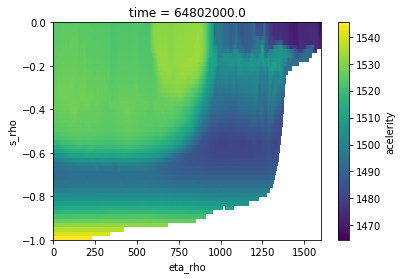

In [14]:
c.isel(xi_rho=10).plot()

In [ ]:
# store to netcdf file
sds = xr.merge([u_uni, v_uni, omega_uni, c, z_uni])
sds = sds.chunk({'xi_rho': 10, 'eta_rho': None})
print(sds)
sds.to_netcdf('/home1/datawork/aponte/cognac/isl/uvomegac.nc',  mode='w')
print(sds)

<xarray.Dataset>
Dimensions:    (eta_rho: 1602, s_rho: 50, xi_rho: 2002)
Coordinates:
    time       float32 64802000.0
  * s_rho      (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 ...
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    u          (s_rho, eta_rho, xi_rho) float64 dask.array<shape=(50, 1602, 2002), chunksize=(50, 1602, 10)>
    v          (s_rho, eta_rho, xi_rho) float64 dask.array<shape=(50, 1602, 2002), chunksize=(50, 1602, 10)>
    omega      (s_rho, eta_rho, xi_rho) float64 dask.array<shape=(50, 1602, 2002), chunksize=(50, 1602, 10)>
    acelerity  (s_rho, eta_rho, xi_rho) float64 dask.array<shape=(50, 1602, 2002), chunksize=(50, 1602, 10)>
    z          (s_rho) float64 dask.array<shape=(50,), chunksize=(50,)>


/home1/datahome/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [17]:
print(u)
print(u_uni)

<xarray.DataArray 'u' (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
dask.array<shape=(50, 1602, 2002), dtype=float32, chunksize=(50, 1602, 1)>
Coordinates:
    time     float32 64802000.0
  * s_rho    (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 -0.85 ...
Dimensions without coordinates: eta_rho, xi_rho
<xarray.DataArray 'u' (s_rho: 50, eta_rho: 1602, xi_rho: 2002)>
dask.array<shape=(50, 1602, 2002), dtype=float64, chunksize=(50, 1602, 1)>
Coordinates:
    time     float32 64802000.0
  * s_rho    (s_rho) float32 -0.99 -0.97 -0.95 -0.93 -0.91 -0.89 -0.87 -0.85 ...
Dimensions without coordinates: eta_rho, xi_rho


---

---

---